In [1]:
from regression import *
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [2]:
lr = LinearRegression(gradient=True)
lr.fit(X_train, y_train)
print(mean_squared_error(y_test, lr.predict(X_test)))

4455.887964777993


In [3]:
ridge = Ridge(alpha=1, gradient=True)
ridge.fit(X_train, y_train)
print(mean_squared_error(y_test, ridge.predict(X_test)))

4934.151347342292


In [4]:
lasso = Lasso(alpha=1, gradient=True)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_test, lasso.predict(X_test)))

4737.228357165928


In [12]:
def f(x):
    return 3 * np.sin(x) + x + 10 + np.random.normal(0, 2)

X = np.vstack(np.linspace(-10, 10, 100))
sinx = np.vstack(np.sin(X))
y = [f(x) for x in X]

In [13]:
x = np.concatenate((X, sinx), axis=1)

In [14]:
lr = LinearRegression(gradient=False)
lr.fit(x, y)

array([[ 0.95227653],
       [ 2.52336116],
       [10.16402594]])

In [15]:
ridge = Ridge(alpha=1, gradient=True)
ridge.fit(x, y)

array([0.95938536, 0.85190509, 9.08192328])

In [20]:
lasso = Lasso(alpha=1, gradient=True)
lasso.fit(x, y)

array([0.91348262, 2.93235658, 9.49531819])

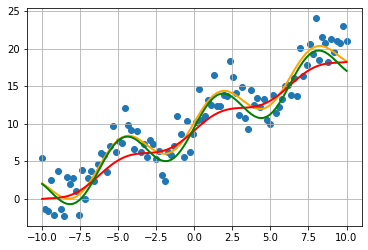

In [23]:
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X, lr.coef_[0] * X + lr.coef_[1] * np.sin(X) + lr.coef_[2], color='orange', linewidth=2)
ax.plot(X, ridge.coef_[0] * X + ridge.coef_[1] * np.sin(X) + ridge.coef_[2], color='red', linewidth=2)
ax.plot(X, lasso.coef_[0] * X + lasso.coef_[1] * np.sin(X) + lasso.coef_[2], color='green', linewidth=2)
ax.grid()